# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, 
we're going to simplify it: prdicting a numerical variable based on some other combination of variables, even shorter.. predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


### Creating some data to view and fit

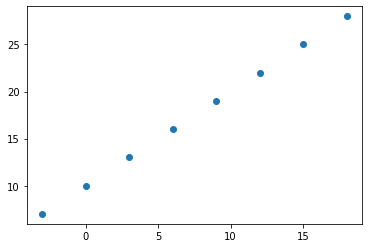

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-3.0, 0.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0])

# Create labels
y = np.array([ 7., 10., 13., 16., 19., 22., 25., 28.])

# Visualize it
plt.scatter(x, y);

## Input and Output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.house_price
2. **Compiling a model** - define 
   2.1 *the loss function* (in other words, the function which tells our model how wrong it is) and 
   2.2 *the optimizer* (tells our model how to impove the patterns its learning) and 
   2.3 *the evaluation metrice* (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [4]:
# Turn NumPy arrays into Tensors 
X = tf.cast(tf.constant(x), dtype=tf.float32)
Y = tf.cast(tf.constant(y), dtype=tf.float32)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-3.,  0.,  3.,  6.,  9., 12., 15., 18.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 7., 10., 13., 16., 19., 22., 25., 28.], dtype=float32)>)

In [5]:
# Set random seed (Very first model which create together with lecturer)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
 tf.keras.layers.Dense(1)   
])

# 2. Compiling the model
model.compile(loss = tf.keras.losses.mae, # 'mae' is short for Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(), # 'sgd' is short for Stochasitc Gradient Descent
              metrics = ["mae"])

# 3. Fit the model (OLD)
# model.fit(X, Y, epochs=20)

# 3. Fit the model (NEW)
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5) # <- update this line cause of New Tensorflow version

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 13.2246 - mae: 13.2246
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 12.6521 - mae: 12.6521
Epoch 3/5
1/1 [==============================] - 0s 26ms/step - loss: 12.0796 - mae: 12.0796
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.5071 - mae: 11.5071
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9346 - mae: 10.9346


In [6]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-3.,  0.,  3.,  6.,  9., 12., 15., 18.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 7., 10., 13., 16., 19., 22., 25., 28.], dtype=float32)>)

In [7]:
# Try and make a prediction using our model
Y_pred = model.predict([21.0])
Y_pred

1/1 [==============================] - 0s 153ms/step


array([[19.896255]], dtype=float32)

In [8]:
Y_pred + 11

array([[30.896255]], dtype=float32)

## Improving our Model

We can improve the model by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layers.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it traning for longer) or on more data (give the model more examples to learn from).

In [9]:
# Rebuild the model (The model which improved by myself! YESSSS )
# 1. Create the model
model = tf.keras.Sequential([
 tf.keras.layers.Dense(100, activation="relu"),
 #tf.keras.layers.Dense(150, activation="relu"),
 #tf.keras.layers.Dense(150, activation="relu"),
 tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(lr=0.1), 
              metrics = ["mae"])

# 3. Fitting the model(this time will tranin for longer)
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 863ms/step - loss: 18.5608 - mae: 18.5608
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 5.5077 - mae: 5.5077
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8342 - mae: 11.8342
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7281 - mae: 11.7281
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 6.6698 - mae: 6.6698
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 3.1246 - mae: 3.1246
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 5.8537 - mae: 5.8537
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 5.7284 - mae: 5.7284
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 3.1913 - mae: 3.1913
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 4.0417 - mae: 4.0417
Epoch 11/100
1/1 [==============================] - 0s 35ms/step - loss: 5

In [10]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-3.,  0.,  3.,  6.,  9., 12., 15., 18.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 7., 10., 13., 16., 19., 22., 25., 28.], dtype=float32)>)

In [11]:
# Try and make a prediction using our model
Y_pred = model.predict([30.0])
Y_pred

1/1 [==============================] - 0s 307ms/step


array([[44.480392]], dtype=float32)

In [12]:
# Rebuild the model (The model which improved together with Lecturer )
# 1. Create the model (with extra hidden layer)
model2 = tf.keras.Sequential([
 tf.keras.layers.Dense(60, activation="relu"),
 tf.keras.layers.Dense(1)
])
# 2. Compile the model
model2.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(lr=0.01), 
              metrics = ["mae"])

# 3. Fitting the model(this time will tranin for longer)
model2.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 839ms/step - loss: 18.5432 - mae: 18.5432
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 17.6504 - mae: 17.6504
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 16.7638 - mae: 16.7638
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 15.8829 - mae: 15.8829
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 15.0072 - mae: 15.0072
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 14.1362 - mae: 14.1362
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 13.2705 - mae: 13.2705
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 12.3954 - mae: 12.3954
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 11.5171 - mae: 11.5171
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 10.6282 - mae: 10.6282
Epoch 11/100
1/1 [==============================

In [13]:
# Try and make a prediction using our model
Y_pred = model2.predict([30.0])
Y_pred

1/1 [==============================] - 0s 140ms/step


array([[41.824448]], dtype=float32)

#### Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden (Dense) units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more Data
* Fitting for longer (increasing epochs)

## Evaluating a Model

In practice, typical workflow we'll go through when building neural network is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model ...
```

When it comes to evaluation .. there are 3 words we should memorize:

"Visualize, visualize, visualize"

Ideas to Visualize:
* The data - what data are working with? what does it looks like?
* The model itself - what does our model looks like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (like the original labels)?

In [14]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)

# Make labels for the dataset
y = X +10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

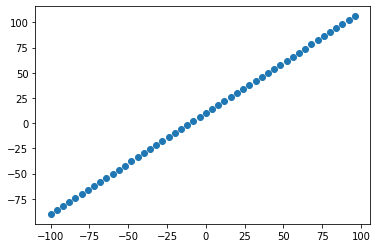

In [15]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter (X,y)

### The 3 sets ...
* Training Set - the model leans from this data, which is typically 70-80% of the total data we have available.
* Validation Set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test Set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [16]:
# Check the length of the dataset
len(X)

50

In [17]:
# Split the data into train and test sets
X_train = X[:40]# train_data : first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # test_data : last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualing the data
Now we've got data in training and test sets, so visualize it again!

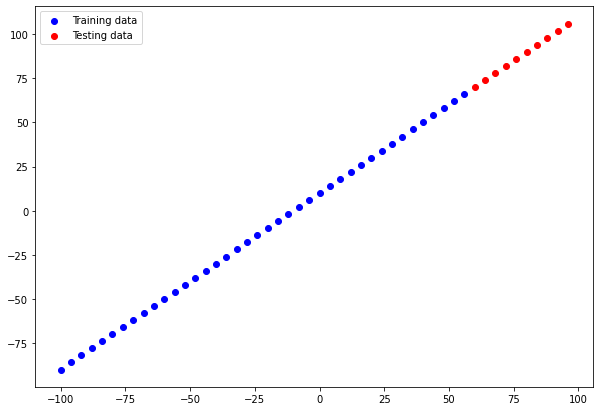

In [18]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="r", label="Testing data")
# Show a legend
plt.legend();

In [19]:
# Build a neural network for data
model3 = tf.keras.Sequential([
 tf.keras.layers.Dense(70, activation="relu"),
 tf.keras.layers.Dense(1)
])
# 2. Compile the model
model3.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(lr=0.01), 
              metrics = ["mae"])

# 3. Fitting the model(this time will tranin for longer)
model3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 17ms/step - loss: 36.6905 - mae: 36.6905
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 28.7404 - mae: 28.7404
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 21.3529 - mae: 21.3529
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 14.1410 - mae: 14.1410
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 8.4305 - mae: 8.4305
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 8.7282 - mae: 8.7282
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.2932 - mae: 8.2932
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 7.8997 - mae: 7.8997
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 6.5283 - mae: 6.5283
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 6.7153 - mae: 6.7153
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - los

In [20]:
#model3.build(input_shape=)
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 70)                140       
                                                                 
 dense_6 (Dense)             (None, 1)                 71        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Build a neural network for data
# Create a model which builds automatically by defining the input_shape argument

tf.random.set_seed(42)
# Create a model 
model4 = tf.keras.Sequential([
 #tf.keras.layers.Dense(60, activation="relu"),
 tf.keras.layers.Dense(100, input_shape=[1], name="input_layer"),
 tf.keras.layers.Dense(1, name="output_layer")
], name="MODEL_1")
# 2. Compile the model
model4.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(lr=0.01), 
              metrics = ["mae"])

# 3. Fitting the model(this time will tranin for longer)
#model3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [22]:
model4.summary()

Model: "MODEL_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - thest are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

In [23]:
model4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 33.6169 - mae: 33.6169
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 14.2911 - mae: 14.2911
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 11.1352 - mae: 11.1352
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.5091 - mae: 13.5091
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.7146 - mae: 12.7146
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.9578 - mae: 9.9578
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 7.0398 - mae: 7.0398
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.6287 - mae: 9.6287
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 7.8614 - mae: 7.8614
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 7.4162 - mae: 7.4162
Epoch 11/100
2/2 [==============================] - 0s 21ms/ste

In [24]:
model4.summary()

Model: "MODEL_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


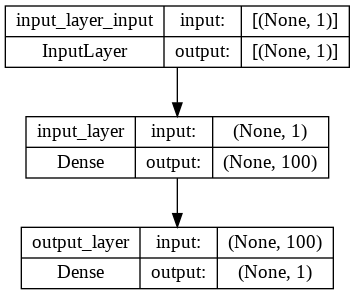

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model=model4, show_shapes=True)

### Visualizing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels. 
Often you'll see this in the form of y_test or y_true versus y_pred(ground truth versus your model's predictions)

In [26]:
# Make some predictions
y_pred = model4.predict(X_test)
y_pred, y_test

1/1 [==============================] - 0s 113ms/step


(array([[ 70.97092 ],
        [ 75.02875 ],
        [ 79.08657 ],
        [ 83.1444  ],
        [ 87.20222 ],
        [ 91.26004 ],
        [ 95.317856],
        [ 99.37568 ],
        [103.4335  ],
        [107.491325]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [27]:
# create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions= y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions data")
  # Show a legend
  plt.legend();

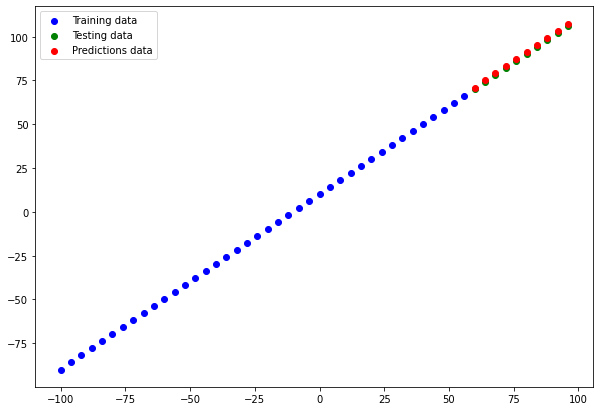

In [28]:
plot_predictions()

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem, we're working on, There will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - Mean Absolute Error, "on average, how wrong is each of my model's predictions"
* MSE - Mean Square Error, "square the average errors"

In [29]:
# Evaluate the model on the test
model4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 284ms/step - loss: 1.2311 - mae: 1.2311


[1.2311255931854248, 1.2311255931854248]

In [30]:
y_pred, y_test

(array([[ 70.97092 ],
        [ 75.02875 ],
        [ 79.08657 ],
        [ 83.1444  ],
        [ 87.20222 ],
        [ 91.26004 ],
        [ 95.317856],
        [ 99.37568 ],
        [103.4335  ],
        [107.491325]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [31]:
# Calclate the mean absolute error
# we need to squeeze y_pred because they have diffent shapes, reference the aboue codes
# the result should be same with evaluate function mae value
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred))
# Calclate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred))
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=1.2311256>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5432537>)

In [32]:
# make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model
1. Get more data - get more examples for your model to train on(more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data.

We will do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build Model_1**
* same as the original model, 1 layer, trained for 100 epochs

In [33]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                         
])
# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 27ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 13ms/ste

1/1 [==============================] - 0s 170ms/step


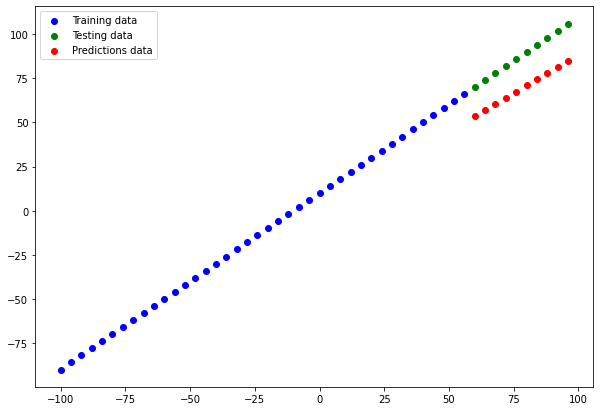

In [34]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [35]:
# Calculate model_1 evaluate metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build Model_2**
*  2 layers, trained for 100 epochs

In [36]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])
# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [==================

1/1 [==============================] - 0s 62ms/step


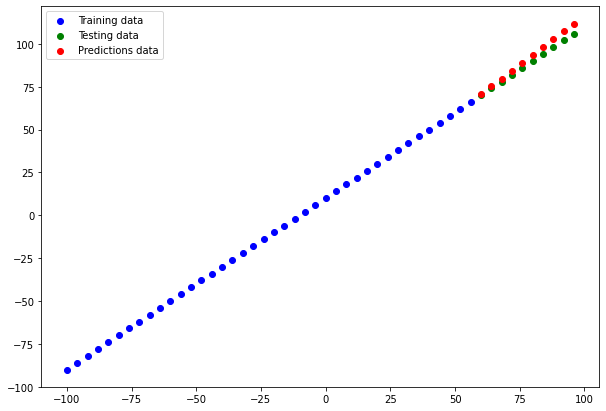

In [37]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [38]:
# Calculate model_2 evaluate metrics
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build Model_3**
*  2 layers, trained for 500 epochs

In [39]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 9m

1/1 [==============================] - 0s 69ms/step


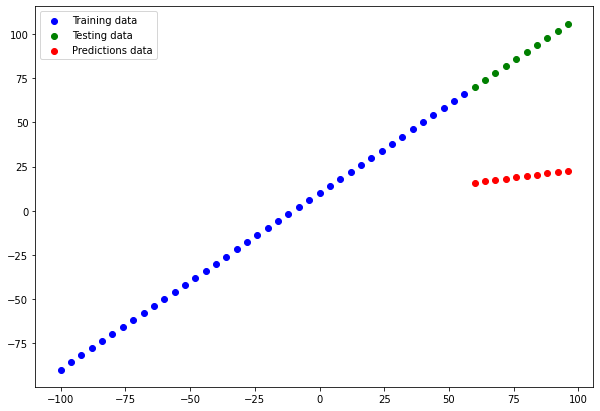

In [40]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [41]:
# Calculate model_3 evaluate metrics
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

# Comparing the results of our experiments
We've run a few experiments, let's compare the results.

In [42]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


Looks like `model_2` performed the best

* The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work.


In [43]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking the experiments

One really good habit in machine learning modelling is to track the results of your experiments.
There are lots of tools to help us

* TensorBoard - a component of the TensorFlow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments

## Saving our model

Saving our models allows us to use them outside of Google Colab (or whereever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too: 
1. The SavedModel format
2. The HDF5 format

In [44]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [45]:
# Save model using the HDF5 format 
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [46]:
# load in the SavedModel format model
load_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
load_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [47]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compare model_2 predictions with SavedModel formate model predictions
model_2_preds = model_2.predict(X_test)
load_SavedModel_format_preds = load_SavedModel_format.predict(X_test)
model_2_preds,load_SavedModel_format_preds, model_2_preds == load_SavedModel_format_preds

1/1 [==============================] - 0s 58ms/step


(array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32), array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32), array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]))

In [49]:
mae(y_true = y_test, y_pred=model_2_preds) == mae(y_true = y_test, y_pred=load_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [50]:
# load in the h5 format model
load_h5_format = tf.keras.models.load_model("best_model_HDF5_format.h5")
model_2.summary()
load_h5_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 3

In [51]:
# Compare model_2 predictions with h5 formate model predictions
model_2_preds = model_2.predict(X_test)
load_h5_format_preds = load_h5_format.predict(X_test)
model_2_preds,load_h5_format_preds, model_2_preds == load_h5_format_preds

1/1 [==============================] - 0s 58ms/step


(array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32), array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32), array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]))

## Download a model (or any other file )from Google Colab
To download any file from Google Colab

Option 1. Go to the "files" tab and right click on the file and click "download"

Option 2. Use code (see the cell below)

Option 3. Save to Google Drive by connection Google Drive and copying it there 

In [52]:
# Download a file from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Larger Example

In [53]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [55]:
# try one-hote encoding the DataFrame
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [56]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
# View X, y
X.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [57]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test), len(y_train), len(y_test )

(1338, 1070, 268, 1070, 268)

In [58]:
# Build a neural network
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [59]:
# check the result of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [60]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

### To improve the insurance Model

In [61]:
# Build a neural network
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])
# 3. Fit the model
history = insurance_model_2.fit(X_train, y_train, epochs=200, verbose = 1)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [62]:
# check the result of the insurance model 2
insurance_model_2.evaluate(X_test, y_test), insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


([3488.785400390625, 3488.78564453125], [7023.32861328125, 7023.32861328125])

In [63]:
X_train.head(), y_train.head()

(      age    bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.95         2           1         0          1           0   
 1285   47  24.32         0           1         0          1           0   
 1142   52  24.86         0           1         0          1           0   
 969    39  34.32         5           1         0          1           0   
 486    54  21.47         3           1         0          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southwest  
 560                  0                 1                 0                 0  
 1285                 1                 0                 0                 0  
 1142                 0                 0                 1                 0  
 969                  0                 0                 1                 0  
 486                  0                 1                 0                 0  ,
 560      9193.83850
 1285     8534.67180
 1142    27117.9937

Text(0.5, 0, 'epochs')

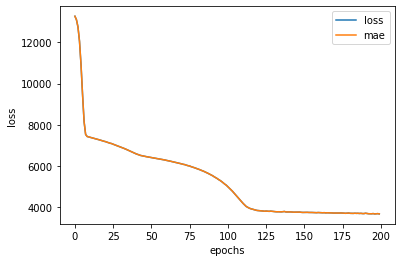

In [64]:
# Plot history

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Many People have solution which called the EarlyStopping Callback, which is a TensorFlow component you can add improving a certain metric

## Preprocessing Data (normalization and standardization)

In [65]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance_preprocess = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_preprocess

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


(<matplotlib.axes._subplots.AxesSubplot at 0x7f3b62941450>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b62941450>)

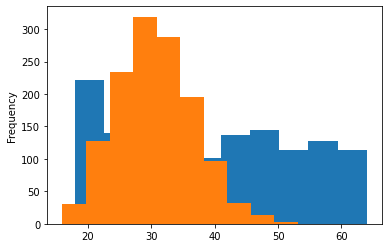

In [66]:
# "age" & "bmi" column
insurance_preprocess["age"].plot(kind="hist"), insurance_preprocess["bmi"].plot(kind="hist")

To prepare our data

In [67]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi","children"]), # turn all numeric values in between 0 - 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)
# Create X & y
X = insurance_preprocess.drop("charges", axis=1)
y = insurance["charges"]

# Build train and test sets
X_NTrain, X_NTest, y_NTrain, y_NTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to training data
ct.fit(X_NTrain)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_Train_Normal = ct.transform(X_NTrain)
X_test_Normal = ct.transform(X_NTest)

In [68]:
# our data looks like
X_NTrain.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [69]:
X_NTrain.shape,X_Train_Normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded.So, we have to rebuild neural network with beautiful dataset

In [70]:
# Build a neural network
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_N = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model_N.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae"])
# 3. Fit the model
history_N = insurance_model_N.fit(X_Train_Normal, y_train, epochs=200, verbose = 1)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [71]:
# check the result of the insurance model normal
insurance_model_N.evaluate(X_test_Normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5776 - mae: 3171.5776


[3171.57763671875, 3171.57763671875]